# Correlation and Regression Analysis

## Correlation Analysis
<p>
    Correlation analysis is a statistical technique for determining the strength of a link between two variables. It is used to detect patterns and trends in data and to forecast future occurrences.
</p>

* Consider a problem with different factors to be considered for making optimal conclusions
* Correlation explains how these variables are dependent on each other.
* Correlation quantifies how strong the relationship between two variables is. A higher value of the correlation coefficient implies a stronger association.
* The sign of the correlation coefficient indicates the direction of the relationship between variables. It can be either positive, negative, or zero.

### Pearson correlation coefficient
<p>
    The Pearson correlation coefficient is the most often used metric of correlation. It expresses the linear relationship between two variables in numerical terms. The Pearson correlation coefficient, written as “r,” is as follows:

r=∑(xi−xˉ)(yi−yˉ) / ∑(xi−xˉ)^2∑(yi−yˉ)^2

where,

    r: Correlation coefficient 
    xi​ : i^th value first dataset X
    xˉ : Mean of first dataset X
    yi​ : i^th value second dataset Y
    yˉ​ : Mean of second dataset Y
</p>

### Spearnman correlation coefficient
<p>
    Spearman’s Rank Correlation Coefficient is a method of calculating the correlation coefficient of qualitative variables and was developed in 1904 by Charles Edward Spearman. In other words, the formula determines the correlation coefficient of variables like beauty, ability, honesty, etc., whose quantitative measurement is not possible. Therefore, these attributes are ranked or put in the order of their preference. 

rk =1 – (6∑D^2)/(N^3–N)

In the given formula,

rk = Coefficient of rank correlation

D = Rank differences

N = Number of variables
</p>

In [1]:
# Importing libraries
import seaborn as sns
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
df = sns.load_dataset('iris')

In [3]:
x = df.drop(['species'], axis=1)
x.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


The above result shows the correlation between each variables.

* Closer to 1 means there is a positive correlation
* Closer to -1 means there is a negative correaltion

These are called directions and strength represents how well the variables are correlated,

* 1 means Perfect correaltion
* 0.9 to 0.6 means strong correlation
* 0.5 to 0.3 means moderate correlation
* 0.3 to 0.1 means weak correlation
* 0 means no correlation

Same is true for negative correaltion as well

Lets try to calculate correlation between sepal_length and petal_length ourselves

In [4]:
sepal_length = df['sepal_length']
petal_length = df['petal_length']

# Using the pearson method
sepal_mean = sepal_length.mean()
petal_mean = petal_length.mean()

formula_top = sum([(ele_1-sepal_mean) * (ele_2-petal_mean) for ele_1, ele_2 in zip(sepal_length, petal_length)])
formula_bottom_1 = sum([(ele-sepal_mean) ** 2 for ele in sepal_length])
formula_bottom_2 = sum([(ele-petal_mean) ** 2 for ele in petal_length])
formula_bottom = (formula_bottom_1 * formula_bottom_2) ** (1/2)

result = formula_top / formula_bottom
result

0.8717537758865832

As we can see from the above result the correlation is same

## Regression Analysis
<p>
    Regression Analysis is a supervised learning analysis where supervised learning is the analyzing or predicting the data based on the previously available data or past data. For supervised learning, we have both train data and test data. Regression analysis is one of the statistical methods for the analysis and prediction of the data. Regression analysis is used for predictive data or quantitative or numerical data. 
</p>

### Simple Linear Regression
<p>
    This involves predicting a dependent variable based on a single independent variable.
</p>

Lets try to apply SLR to the tips dataset

In [5]:
df = sns.load_dataset("tips")
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


Lets find the linear function that would predict a response. Let the independent variable be total_bill and dependent be tip.

In [6]:
total_bill = df["total_bill"]
tip = df["tip"]

<Axes: xlabel='total_bill', ylabel='tip'>

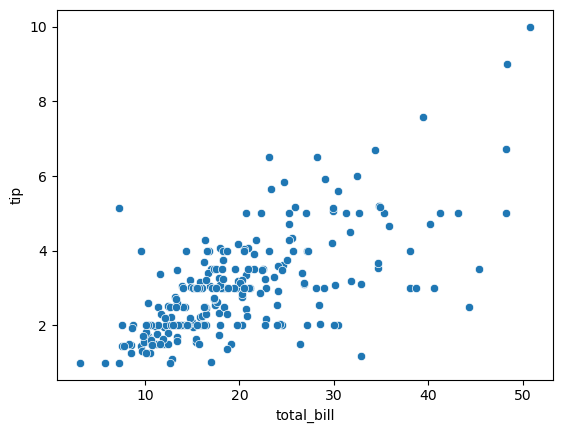

In [7]:
sns.scatterplot(x=total_bill, y=tip)

From the plot it looks there can be a line created, so lets try that

In [8]:
def linear_regression_equation(x, y):
    length = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_x_sq = sum([ele**2 for ele in x])
    sum_xy = sum([ele_1*ele_2 for ele_1, ele_2 in zip(x, y)])
    relation_a = sum_x_sq / sum_x
    relation_b = sum_x / length
    new_sum_x = sum_x * relation_b
    new_sum_y = sum_y * relation_b
    a = (sum_xy - new_sum_y) / (sum_x_sq - new_sum_x)
    new_length = length * relation_a
    new_sum_y = sum_y * relation_a
    b = (sum_xy - new_sum_y) / (sum_x-new_length)
    
    return (a, b)

a, b = linear_regression_equation(total_bill, tip)
print(f"y = {b}+{a}x")

y = 0.9202696135546786+0.10502451738435324x


The above shows the equation for the line where,

* Coefficient of x shows the slope
* The other value is the intercept

<Axes: xlabel='total_bill'>

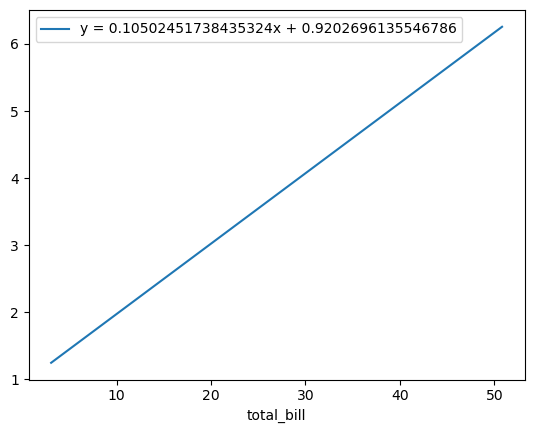

In [9]:
x = total_bill
y = [a*ele + b for ele in x]
sns.lineplot(x=x, y=y, label=f'y = {a}x + {b}')

Above is the line plotted from the slope and the intercept. Lets plot the line and data together.

<Axes: xlabel='total_bill', ylabel='tip'>

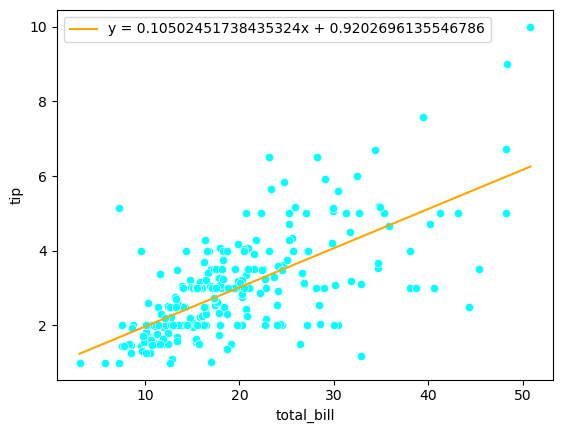

In [10]:
ax = sns.scatterplot(x=total_bill, y=tip, color="Cyan")
sns.lineplot(ax=ax, x=x, y=y, label=f'y = {a}x + {b}', color="Orange")

The above plot shows the data plotted with the line we got from simple linear regression

### Multiple Linear Regression
<p>
    This involves predicting a dependent variable based on multiple independent variables.
</p>